In [1]:
%pylab inline
%run helper_functions.py

import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
sns.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


# Loading the Titanic Dataset (cleaned)

In [4]:
# Load the boston dataset from sklearn
dataset = pd.read_csv("../data/titanic_clean.csv")
X = dataset.drop('survived', axis = 1)
y = dataset.survived

# to print stats
feature_names = X.columns
class_labels = ["Died", "Survived"]

In [3]:
#printing

In [5]:
X.head(10)

,age,sibsp,parch,fare,class,sex_male,alone_True,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,22.0,1,0,7.2500,3,1,0,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,0
2,26.0,0,0,7.9250,3,0,1,0,0,1
3,35.0,1,0,53.1000,1,0,0,0,0,1
4,35.0,0,0,8.0500,3,1,1,0,0,1
5,28.0,0,0,8.4583,3,1,1,0,1,0
6,54.0,0,0,51.8625,1,1,1,0,0,1
7,2.0,3,1,21.0750,3,1,0,0,0,1
8,27.0,0,2,11.1333,3,0,0,0,0,1
9,14.0,1,0,30.0708,2,0,0,1,0,0


In [6]:
y.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: survived, dtype: int64

# Fitting a model with sklearn
(in this case we fit a Decision tree)

In [8]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X,y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

#### Predicting new data...

In [9]:
model.predict(X[0:5])

array([0, 1, 1, 1, 0])

In [13]:
y[0:10]

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: survived, dtype: int64

In [12]:
model.predict(X[0:10])

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1])

# Evaluation metrics

In [14]:
from sklearn.metrics import *
# we predict some data
y_pred = model.predict(X)

#Accuracy
print ("Accuracy (train set) : ", accuracy_score(y, y_pred))

Accuracy (train set) :  0.979752530934


[[547   2]
 [ 16 324]]


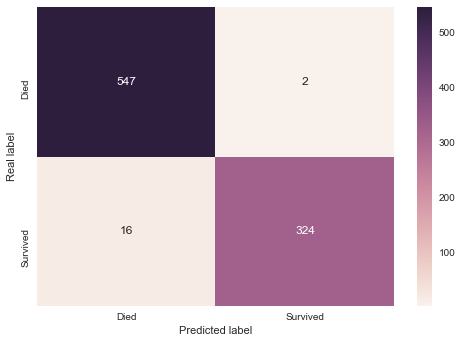

In [15]:
#confusion matrix
cm =  confusion_matrix(y_pred=y_pred, y_true=y, labels=[0,1])
print (cm)
# Plotting confusion matrix (custom help function)
plot_confusion_matrix(cm, class_labels) 

In [16]:
# Classification report
print (classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98       549
          1       0.99      0.95      0.97       340

avg / total       0.98      0.98      0.98       889



# AUC
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

AUC:  0.99902228651


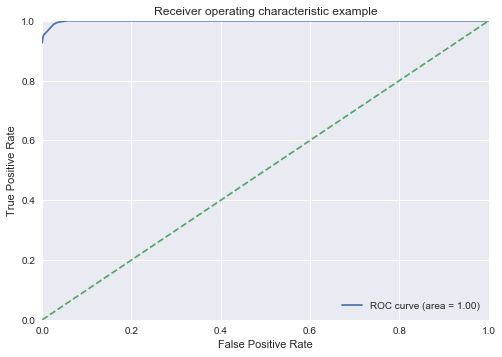

In [19]:
# ROC/AUC
# Getting the probabilities per class
y_probabilities = model.predict_proba(X)

# Custom plot function
get_auc(y, y_probabilities, class_labels, column=1, plot=True) # Helper function


# Properly evaluating with a test set...

#### Splitting in test and train sets, train with train set only

Accuracy (test set):  0.777528089888 

             precision    recall  f1-score   support

          0       0.75      0.96      0.84       275
          1       0.89      0.48      0.62       170

avg / total       0.80      0.78      0.76       445

AUC:  0.801914438503


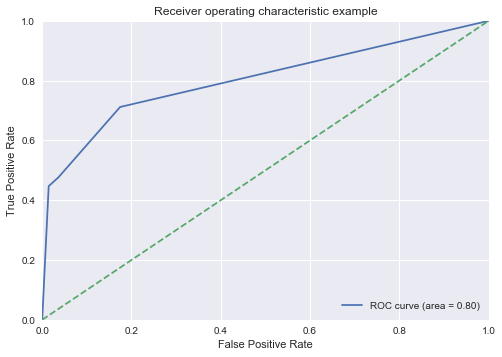

[[265  10]
 [ 89  81]]


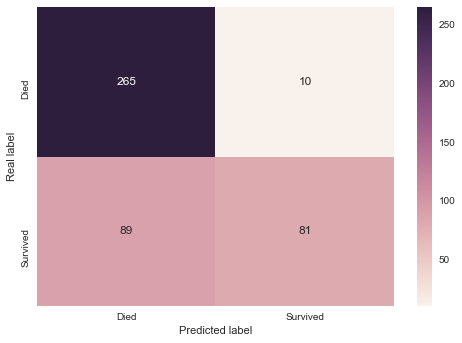

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


#### Train with train set
model  = DecisionTreeClassifier(max_leaf_nodes=4) # max_leaf_nodes=2...10
model.fit(X_train, y_train)


#### Evaluate with test set
# we predict some data
y_pred = model.predict(X_test)

#### Accuracy
print ("Accuracy (test set): ", accuracy_score(y_test, y_pred), "\n")

#### Classification report
print (classification_report(y_test, y_pred))

####  ROC/AUC
# Getting the probabilities per class
y_probabilities = model.predict_proba(X_test)
# Custom plot function
get_auc(y_test, y_probabilities, class_labels, column=1, plot=True) # Help function

#confusion matrix
cm =  confusion_matrix(y_test, y_pred)
print (cm)
# Plotting confusion matrix (custom help function)
plot_confusion_matrix(cm, class_labels) 

# Cross validating
## Cross-validation score

In [31]:
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier() # we can now play with max_depth= 1, 10, 15
scores = cross_val_score(model, X, y, cv=10) # cv makes 10 models with each 90 percent of the data

print(scores)
print("Mean fold accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.68539326  0.82022472  0.71910112  0.7752809   0.83146067  0.76404494
  0.79775281  0.68539326  0.83146067  0.81818182]
Mean fold accuracy: 0.77 (+/- 0.11)


## Cross-validation predict
Predict the whole dataset in a cross-validated way (to avoid overfitting)

Accuracy (cross-validated):  0.808773903262
             precision    recall  f1-score   support

          0       0.81      0.90      0.85       549
          1       0.81      0.66      0.72       340

avg / total       0.81      0.81      0.80       889

AUC:  0.824474981249


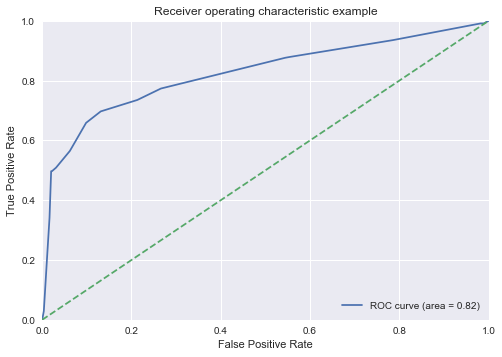

In [33]:
from sklearn.model_selection import cross_val_predict

model = DecisionTreeClassifier(max_leaf_nodes=6) # we can now play with max_depth= 1, 10, 15

####  We use cross-validation to predict all the data with the best model. 
y_pred = cross_val_predict(model, X, y)

print ("Accuracy (cross-validated): ", accuracy_score(y, y_pred))

####  Classification report
print (classification_report(y, y_pred))

####  ROC/AUC
# Getting the probabilities per class
y_probabilities = cross_val_predict(model, X, y, method='predict_proba')
# Custom plot function
get_auc(y, y_probabilities, class_labels, column=1, plot=True) # Help function


# Parameter tuning and Cross Validating

In [37]:
from sklearn.model_selection import GridSearchCV
#### The parameeters to tune (as a dictionary name:values_to_try)
params = { 
           'max_depth'     :  range(1,20),
           'max_features'  :  range(1,10)
         }

#### Grid search
model = DecisionTreeClassifier()
grid = GridSearchCV(estimator=model, cv = 10, param_grid=params )
grid.fit(X, y)

####  Summarize the results of the grid search
print("Best parameters: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best parameters:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=5, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Best score:  0.824521934758


## Evaluating further the best found model
(cross validation using the best model)

Accuracy (cross-validated):  0.795275590551
             precision    recall  f1-score   support

          0       0.80      0.89      0.84       549
          1       0.79      0.64      0.70       340

avg / total       0.79      0.80      0.79       889

AUC:  0.829052823315


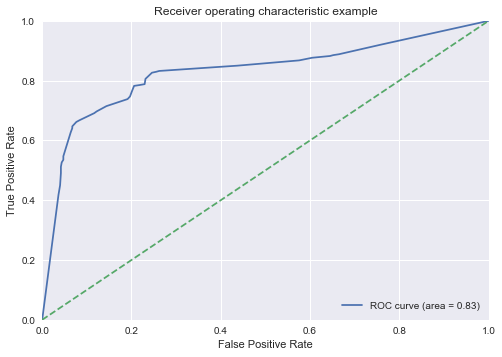

In [38]:
from sklearn.metrics import *
from sklearn.model_selection import cross_val_predict

#### Get the best model from grid search (previous run)
model = grid.best_estimator_

#### FOLLOW THE SAME PROCESS AS BEFORE
#### We use cross-validation to predict all the data with the best model. 
y_pred = cross_val_predict(model, X, y)

#### Accuracy
print ("Accuracy (cross-validated): ", accuracy_score(y, y_pred))

####  Classification report
print (classification_report(y, y_pred))

####  ROC/AUC
# Getting the probabilities per class
y_probabilities = cross_val_predict(model, X, y, method='predict_proba')
# Custom plot function
get_auc(y, y_probabilities, class_labels, column=1, plot=True) # Help function

# Parameter tuning with final test-set evaluation.
- Cross validation to select the best model
- Test-set at the end to report the final accuracy

Best cross validated accuracy after tuning:  0.827974276527
Accuracy (test set):  0.779026217228
             precision    recall  f1-score   support

          0       0.75      0.94      0.83       157
          1       0.86      0.55      0.67       110

avg / total       0.79      0.78      0.77       267

AUC:  0.821829762594


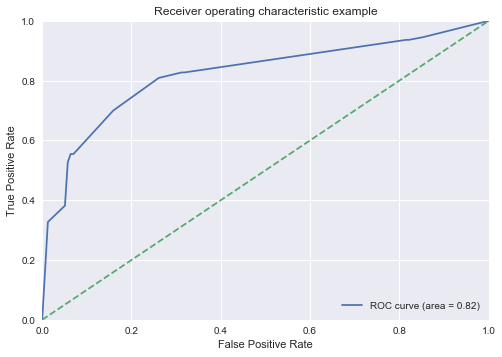

In [40]:
from sklearn.model_selection import GridSearchCV
params = { 
           'max_depth'     :  range(1,20),
           'max_features'  :  range(1,10)
         }


#### Split the data. 
#### Train set to find and the best model using grid search
#### Test set to report the final accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

####  Grid search
model = DecisionTreeClassifier()
grid = GridSearchCV(estimator=model, cv = 10, param_grid=params )
grid.fit(X_train, y_train)
print("Best cross validated accuracy after tuning: ", grid.best_score_)

#### 
#### After tuning, lets see the performance on a seperate test set
y_pred = grid.best_estimator_.predict(X_test)

#### Accuracy on test set
print ("Accuracy (test set): ", accuracy_score(y_test, y_pred))
# Classification report
print (classification_report(y_test, y_pred))

####  ROC/AUC on test set
# Getting the probabilities per class
y_probabilities =  grid.best_estimator_.predict_proba(X_test)
# Custom plot function
get_auc(y_test, y_probabilities, class_labels, column=1, plot=True) # Help function


# Feature importance

In [41]:
grid.best_estimator_.feature_importances_

array([ 0.10415123,  0.05803923,  0.0194676 ,  0.09114221,  0.17632718,
        0.52227855,  0.        ,  0.00546723,  0.02312676,  0.        ])

In [42]:
important_features = pd.Series(grid.best_estimator_.feature_importances_ ,index=X.columns)
important_features.sort_values(ascending=False)


sex_male                   0.522279
class                      0.176327
age                        0.104151
fare                       0.091142
sibsp                      0.058039
embark_town_Queenstown     0.023127
parch                      0.019468
embark_town_Cherbourg      0.005467
embark_town_Southampton    0.000000
alone_True                 0.000000
dtype: float64

# How to handle class imbalance


In [44]:
wine_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [45]:
wine_df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
967,8.5,0.660,0.20,2.1,0.097,23.0,113.0,0.99733,3.13,0.48,9.2,5
1554,6.6,0.855,0.02,2.4,0.062,15.0,23.0,0.99627,3.54,0.60,11.0,6
662,7.2,0.570,0.06,1.6,0.076,9.0,27.0,0.99720,3.36,0.70,9.6,6
1373,7.7,0.750,0.27,3.8,0.110,34.0,89.0,0.99664,3.24,0.45,9.3,5
962,6.6,0.570,0.02,2.1,0.115,6.0,16.0,0.99654,3.38,0.69,9.5,5


In [46]:
wine_df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## Let make it more imbalanced than it is....

In [47]:
wine_df['quality'] = [1 if q >= 8 else 0 for q in wine_df.quality ]

In [48]:
wine_df.quality.value_counts()

0    1581
1      18
Name: quality, dtype: int64

In [50]:
# prepare the data
X = wine_df.drop('quality', axis =1)
y = wine_df.quality
X, y = sklearn.utils.shuffle(X,y)

Accuracy (cross-validated):  0.988742964353
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1581
          1       0.00      0.00      0.00        18

avg / total       0.98      0.99      0.98      1599



/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


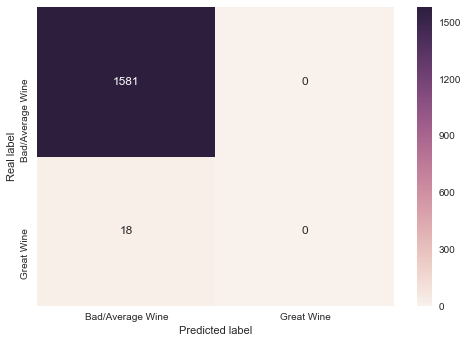

In [51]:
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()#(class_weight='balanced')
y_pred = cross_val_predict(model, X, y)

#### Accuracy
print ("Accuracy (cross-validated): ", accuracy_score(y, y_pred))

####  Classification report
print (classification_report(y, y_pred))


#confusion matrix
cm =  confusion_matrix(y_pred=y_pred, y_true=y, labels=[0,1])
# Plotting confusion matrix (custom help function)
plot_confusion_matrix(cm, ["Bad/Average Wine", "Great Wine"]) 